In [28]:
import glob
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO
import numpy as np


In [57]:
# SET PATHS FOR GENERAL BUSCO LOCATION
BUSCO_PATHS = '/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/phylogenomics/reference-genomes/busco_downloads/lineages/eukaryota_odb10/info/ogs.id.info'
BUSCO_LIST = list(set(list(pd.read_csv(BUSCO_PATHS, sep='\t', header=None)[1])))

#BASE PATH TO MAG BUSCO RUNS

# TOPAZ MAGs
MAG_BASE_PATH=os.path.join('/vortexfs1/scratch/halexander/2020-eukms-annotate/')
MAG_DIR = os.path.join(MAG_BASE_PATH, 'busco/eukaryota_odb10')
MAG_BASE_TSV = pd.read_csv(os.path.join(MAG_BASE_PATH, 'busco-update-2021-01-12.tsv'), 
            sep='\t', index_col=0)
MAG_BASE_TSV['Proportion_Complete'] = (MAG_BASE_TSV.Complete_ALL + MAG_BASE_TSV.Fragmented)/255

# DELMONT MAGs
DMAG_BASE_PATH=os.path.join('/vortexfs1/omics/alexander/halexander/2020-delmont')
DMAG_DIR = os.path.join(DMAG_BASE_PATH, 'busco/eukaryota_odb10')
DMAG_BASE_TSV = pd.read_csv(os.path.join(DMAG_BASE_PATH, 'busco-summary.tsv'), 
            sep='\t', index_col=0)
DMAG_BASE_TSV['Proportion_Complete'] = (DMAG_BASE_TSV.Complete_ALL + DMAG_BASE_TSV.Fragmented)/255


In [62]:
# SET PROPORTION CUTOFF TO INCLUDE
BUSCO_COMPLETENESS_CUTOFF = .5

MAG_COMPLETE_LIST = MAG_BASE_TSV.loc[MAG_BASE_TSV.Proportion_Complete>=BUSCO_COMPLETENESS_CUTOFF].index
DMAG_COMPLETE_LIST = DMAG_BASE_TSV.loc[DMAG_BASE_TSV.Proportion_Complete>=BUSCO_COMPLETENESS_CUTOFF].index
            
                       

# Loop through identified completed MAGs (>50% BUSCO) and create a table that contains a boolean related to the presence / absence of the protein within the MAG

In [84]:
def GetBUSCOBoolean(MAG_DIR, MAG_COMPLETE_LIST, BUSCO_LIST):
#     i=MAG_COMPLETE_LIST[0]
    COMPLETE_DF = pd.DataFrame(columns = MAG_COMPLETE_LIST,index=BUSCO_LIST)
    COMPLETE_DF=COMPLETE_DF.fillna(0)
    COMPLETE_FRAGMENTED_DF=COMPLETE_DF.fillna(0)
    for i in MAG_COMPLETE_LIST:
        df=pd.read_csv(os.path.join(MAG_DIR, i, 'run_eukaryota_odb10', 
                'full_table.tsv'), sep='\t', header=2, index_col=0)
        complete=df.loc[df.Status == 'Complete'].index
        fragmented=df.loc[df.Status == 'Fragmented'].index
        COMPLETE_DF.loc[complete,i]=1
        COMPLETE_FRAGMENTED_DF.loc[fragmented,i]=1
        COMPLETE_FRAGMENTED_DF.loc[complete,i]=1
    return(COMPLETE_DF, COMPLETE_FRAGMENTED_DF)

MAG_C_BOO,MAG_CF_BOO = GetBUSCOBoolean(MAG_DIR, MAG_COMPLETE_LIST, BUSCO_LIST)
DMAG_C_BOO,DMAG_CF_BOO = GetBUSCOBoolean(DMAG_DIR, DMAG_COMPLETE_LIST, BUSCO_LIST)


<AxesSubplot:>

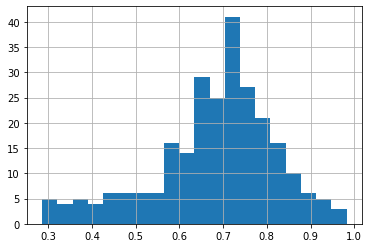

In [87]:
# Plot of the relative coverage of protins across buscos
(MAG_CF_BOO.sum(axis=1)/len(MAG_CF_BOO.columns)).hist(bins=20)


<AxesSubplot:>

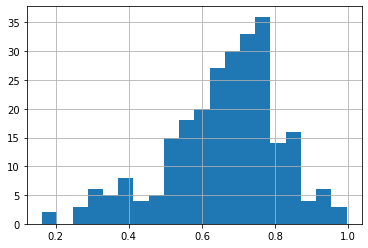

In [88]:
(DMAG_CF_BOO.sum(axis=1)/len(DMAG_CF_BOO.columns)).hist(bins=20)

In [99]:
# BUSCO cutoff

COV90 = MAG_CF_BOO.loc[(MAG_CF_BOO.sum(axis=1)/len(MAG_CF_BOO.columns))>=.90].index
COV80 = MAG_CF_BOO.loc[(MAG_CF_BOO.sum(axis=1)/len(MAG_CF_BOO.columns))>=.80].index


<AxesSubplot:>

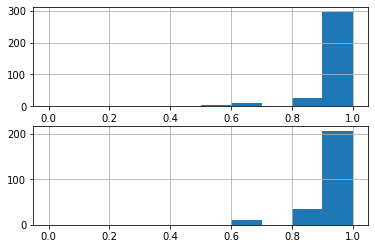

In [114]:
## Check coverage in our BUSCO set of MAGs
fig, ax =plt.subplots(2)
(MAG_CF_BOO.loc[COV90].sum()/len(COV90)).hist(bins=10, range=(0,1), ax=ax[0])
(DMAG_CF_BOO.loc[COV90].sum()/len(COV90)).hist(bins=10, range=(0,1), ax = ax[1])

# Reference genomes


In [115]:
# Reference Genomes BUSCO hits
REF_DIR='/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/phylogenomics/reference-genomes/busco/eukaryota_odb10'

REF_GENOMES=[]
for o in glob.glob(os.path.join(REF_DIR,'*')):
    REF_GENOMES.append(os.path.basename(o))

REF_busco_completeness_df = pd.DataFrame(columns = REF_GENOMES,index=BUSCO_LIST)
REF_busco_completeness_df=REF_busco_completeness_df.fillna(0)
REF_busco_completeness_fragmented_df=REF_busco_completeness_df.fillna(0)
for i in REF_GENOMES:
    df=pd.read_csv(os.path.join(REF_DIR, i, 'run_eukaryota_odb10', 
                'full_table.tsv'), sep='\t', header=2, index_col=0)
    complete=df.loc[df.Status == 'Complete'].index
    fragmented=df.loc[df.Status == 'Fragmented'].index
    REF_busco_completeness_df.loc[complete,i]=1
    REF_busco_completeness_fragmented_df.loc[fragmented,i]=1
    REF_busco_completeness_fragmented_df.loc[complete,i]=1

    

<AxesSubplot:>

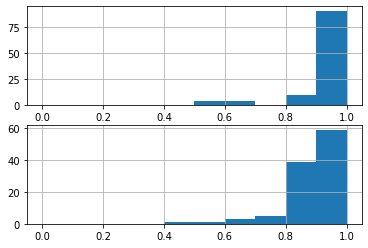

In [125]:
fig, ax =plt.subplots(2)

(REF_busco_completeness_fragmented_df.loc[COV90].sum()/len(COV90)).hist(bins=10, range=(0,1), ax=ax[0])
(REF_busco_completeness_fragmented_df.loc[COV80].sum()/len(COV80)).hist(bins=10, range=(0,1), ax=ax[1])

In [126]:
proteins

Index(['777920at2759', '341721at2759', '1106766at2759', '1423847at2759',
       '1014314at2759', '1197019at2759', '625387at2759', '551907at2759',
       '1259741at2759', '1479417at2759', '369837at2759', '1346432at2759',
       '1025450at2759', '426305at2759', '1545004at2759', '1355894at2759',
       '917326at2759', '570797at2759', '664730at2759', '1010730at2759',
       '1287094at2759', '1379600at2759', '166920at2759', '834694at2759',
       '905026at2759', '257318at2759', '83779at2759', '330169at2759',
       '1538526at2759', '975557at2759', '604979at2759', '100698at2759',
       '390348at2759', '299766at2759', '418107at2759', '734666at2759',
       '836599at2759', '720340at2759', '1248958at2759', '375960at2759',
       '931188at2759', '1249159at2759', '1182451at2759', '179362at2759',
       '97116at2759', '549762at2759', '1217666at2759', '355408at2759',
       '774318at2759', '736068at2759', '513979at2759', '1194797at2759',
       '1260807at2759', '1085752at2759', '296129at2759', '76

In [127]:
MAGs

Index(['RS-all-SRF-0-8-5-00_bin-105', 'SPO-all-SRF-0-8-5-00_bin-190',
       'NAO-all-MES-0-8-5-00_bin-73', 'SAO-all-SRF-20-180-00_bin-42',
       'NAO-all-SRF-0-8-5-00_bin-17', 'SPO-SPSG-MIX-0-8-5-00_bin-132',
       'MS-all-DCM-0-8-5-00_bin-224', 'MS-all-DCM-0-8-5-00_bin-636',
       'SPO-all-SRF-5-20-00_bin-108', 'SPO-SPSG-DCM-0-8-5-00_bin-172',
       ...
       'MS-all-SRF-180-2000-00_bin-83', 'SAO-all-SRF-0-8-5-00_bin-26',
       'SPO-SPSG-MES-0-8-5-00_bin-179', 'SAO-all-DCM-0-8-5-00_bin-428',
       'SPO-SPSG-SRF-0-8-5-00_bin-658', 'SPO-SPSG-SRF-0-8-5-00_bin-277',
       'NAO-all-DCM-0-8-5-00_bin-77', 'SAO-all-DCM-0-8-5-00_bin-2',
       'SPO-CHIL-DCM-0-8-5-00_bin-46', 'IO-all-SRF-0-8-5-00_bin-89'],
      dtype='object', length=336)

In [149]:

def WriteConcatenatedProteins(proteins, MAG_DIR, MAGs, outdir=os.path.join('extracted', str(date.today()))):
    if not os.path.exists(outdir):
            os.makedirs(outdir)
    for j, o in enumerate(proteins):
        all_og=[]
        og_file = os.path.join(outdir,o+'.concatenated.faa')
        for i, m in enumerate(MAGs):
            og_path=''
            complete_path = os.path.join(MAG_DIR, m, 
                    'run_eukaryota_odb10','busco_sequences',
                    'single_copy_busco_sequences', o+'.faa')
            frag_path = os.path.join(MAG_DIR, m, 
                    'run_eukaryota_odb10','busco_sequences',
                    'fragmented_busco_sequences', o+'.faa')
            #check for complete OG first
            if os.path.isfile(complete_path):
                og_path = complete_path
            #check for fragmented OG
            elif os.path.isfile(frag_path):
                og_path = frag_path
            #Otherwise just skip it... 
            if og_path!='':
                for record in SeqIO.parse(og_path, "fasta"):
                    record.id = m
                    record.name=m
                    all_og.append(record)
            #create an empty sequence record with an 'X'-- undetermined amino acid. 
            else: 
                record = SeqRecord(Seq("-"),id=m,name=m,description="no-record")
                all_og.append(record)
#     for i, m in enumerate(REF_GENOMES):
#         og_path=''
#         complete_path = os.path.join(REF_DIR, m, 
#                 'run_eukaryota_odb10','busco_sequences',
#                 'single_copy_busco_sequences', o+'.faa')
#         frag_path = os.path.join(REF_DIR, m, 
#                 'run_eukaryota_odb10','busco_sequences',
#                 'fragmented_busco_sequences', o+'.faa')
#         #check for complete OG first
#         if os.path.isfile(complete_path):
#             og_path = complete_path
#         #check for fragmented OG
#         elif os.path.isfile(frag_path):
#             og_path = frag_path
#         #Otherwise just skip it... 
#         if og_path!='':
#             for record in SeqIO.parse(og_path, "fasta"):
#                 record.id = m
#                 record.name=m
#                 all_og.append(record)
#         #create an empty sequence record with an 'X'-- undetermined amino acid. 
#         else: 
#             record = SeqRecord(Seq("-"),id=m,name=m,description="no-record")
#             all_og.append(record)
        if os.path.isfile(og_file):
            with open(og_file, "a") as outfasta:
                SeqIO.write(all_og, outfasta,'fasta')
            outfasta.close()    
        else:
            with open(og_file, "w") as outfasta:
                SeqIO.write(all_og, outfasta,'fasta')
            outfasta.close()    
    if os.path.isfile(os.path.join(outdir,'ALLMAGS.list')):
        with open(os.path.join(outdir,'ALLMAGS.list'), 'a') as f:
            f.write('\n'.join(MAGs))
            f.write('\n')
    else: 
        with open(os.path.join(outdir,'ALLMAGS.list'), 'w') as f:
            f.write('\n'.join(MAGs))
            f.write('\n')

In [151]:
outdir = os.path.join('extracted','COV90'+str(date.today()))
WriteConcatenatedProteins(COV90, MAG_DIR, MAG_COMPLETE_LIST, outdir=outdir)
WriteConcatenatedProteins(COV90, DMAG_DIR, DMAG_COMPLETE_LIST, outdir=outdir)
WriteConcatenatedProteins(COV90, REF_DIR, REF_GENOMES, outdir=outdir)
with open(os.path.join(outdir,'ALLPROTEINS.list'), 'w') as g:
    g.write('\n'.join(COV90))

In [154]:
outdir = os.path.join('extracted','COV80'+str(date.today()))
WriteConcatenatedProteins(COV80, MAG_DIR, MAG_COMPLETE_LIST, outdir=outdir)
WriteConcatenatedProteins(COV80, DMAG_DIR, DMAG_COMPLETE_LIST, outdir=outdir)
WriteConcatenatedProteins(COV80, REF_DIR, REF_GENOMES, outdir=outdir)
with open(os.path.join(outdir,'ALLPROTEINS.list'), 'w') as g:
    g.write('\n'.join(proteins))

In [159]:
REF_busco_completeness_fragmented_df.loc[COV90,'MMETSP0818'].sum()

10

In [162]:
outdir = os.path.join('extracted','COV90_TOPAZ_'+str(date.today()))
WriteConcatenatedProteins(COV90, MAG_DIR, MAG_COMPLETE_LIST, outdir=outdir)
with open(os.path.join(outdir,'ALLPROTEINS.list'), 'w') as g:
    g.write('\n'.join(COV90))

In [163]:
outdir = os.path.join('extracted','COV80_TOPAZ_'+str(date.today()))
WriteConcatenatedProteins(COV80, MAG_DIR, MAG_COMPLETE_LIST, outdir=outdir)
with open(os.path.join(outdir,'ALLPROTEINS.list'), 'w') as g:
    g.write('\n'.join(proteins))

<function __main__.readin_ani(file)>

In [33]:
fani_comp

1,IO-all-DCM-0-8-5-00_bin-104,IO-all-DCM-0-8-5-00_bin-107,IO-all-DCM-0-8-5-00_bin-111,IO-all-DCM-0-8-5-00_bin-12,IO-all-DCM-0-8-5-00_bin-120,IO-all-DCM-0-8-5-00_bin-130,IO-all-DCM-0-8-5-00_bin-147,IO-all-DCM-0-8-5-00_bin-157,IO-all-DCM-0-8-5-00_bin-17,IO-all-DCM-0-8-5-00_bin-21,...,TARA_SOC_28_MAG_00071,TARA_SOC_28_MAG_00072,TARA_SOC_28_MAG_00073,TARA_SOC_28_MAG_00074,TARA_SOC_28_MAG_00075,TARA_SOC_28_MAG_00076,TARA_SOC_28_MAG_00077,TARA_SOC_28_MAG_00078,TARA_SOC_28_MAG_00079,TARA_SOC_28_MAG_00080
0,,,,,,,,,,,,,,,,,,,,,
IO-all-DCM-0-8-5-00_bin-104,100.0000,NaN,74.5657,74.5590,74.6903,NaN,NaN,74.5737,74.6215,74.5590,...,NaN,74.7430,NaN,74.6856,74.6613,NaN,74.6759,74.5949,74.6262,NaN
IO-all-DCM-0-8-5-00_bin-107,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IO-all-DCM-0-8-5-00_bin-111,74.5898,NaN,100.0000,75.1033,74.7017,74.7280,NaN,NaN,74.7226,74.5991,...,NaN,74.6241,NaN,75.1093,74.7165,NaN,74.5724,74.7943,74.6783,NaN
IO-all-DCM-0-8-5-00_bin-12,74.5837,NaN,75.1133,100.0000,74.6443,NaN,NaN,NaN,74.6069,74.5550,...,NaN,74.6296,NaN,74.9889,74.6768,NaN,74.5963,74.7040,74.6473,NaN
IO-all-DCM-0-8-5-00_bin-120,74.6746,NaN,74.6935,74.6479,100.0000,NaN,NaN,NaN,74.8074,74.6004,...,NaN,74.6902,NaN,74.7656,74.7031,NaN,74.7000,74.7415,74.7449,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARA_SOC_28_MAG_00076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.5711,NaN,NaN,...,NaN,74.5617,74.8519,NaN,74.5606,100.0000,74.5643,74.5679,74.5248,75.6425
TARA_SOC_28_MAG_00077,74.7022,NaN,74.5940,74.6236,NaN,NaN,NaN,74.6426,NaN,74.5948,...,74.7463,74.6819,74.5606,74.6994,74.6473,74.5726,100.0000,74.7196,74.6303,74.6932
TARA_SOC_28_MAG_00078,74.6586,NaN,74.7244,74.6686,74.6599,74.6430,NaN,74.6829,74.7074,74.6844,...,74.6935,75.1744,74.6426,75.0133,75.0503,74.6413,74.7938,100.0000,75.1778,74.6241
